## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tqdm
import math

## Implementing The Perceptron Class

In [ ]:
class Perceptron:
  def __init__(self,X,y):
    self.data = X
    self.labels = y
    self.weights = 1.5*np.random.rand(len(X.columns)+1)
    self.length = len(X.columns)+1
    self.updates = [[i] for i in list(self.weights)]
  def __augmentdata__(self):
    self.data["bias"] = np.ones(self.data.shape[0])
  def __checkresult__(self,row,yi):
    return np.dot(row,self.weights)*yi
  def __predict__(self,row):
    return (1 if np.dot(row,self.weights)>0 else -1)
  def __getweights__(self):
    return self.weights
  def __getweightupdates__(self):
    return self.updates
  def __plotupdates__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(len(self.updates), 1)
    stro = ""
    count = 0
    while count<len(self.weights)-1:
      stro+="w"
      stro+=str(count+1)
      stro+=" "
      count+=1
    stro+="bias"
    axs[0].set_title("plots for all the respective weight updates vs no of iterations in perceptron algorithm for "+stro)
    for i, update in enumerate(self.updates):
        axs[i].plot(update)

    plt.show()

  def __train__(self):
    self.__augmentdata__()
    bestfit = True
    while True:
      for row,yi in zip(self.data.to_numpy(),self.labels):
        if (self.__checkresult__(row,yi)<=0):
          res = np.dot(row,self.weights)
          if res<0:
            self.weights = self.weights+np.array(row)
            for i in range(len(list(self.weights))):
              self.updates[i].append(list(self.weights)[i])
          elif res>=0:
            self.weights = self.weights-np.array(row)
            for i in range(len(list(self.weights))):
              self.updates[i].append(list(self.weights)[i])
          bestfit = False

      if bestfit==False:
        bestfit=True
      else:
        break
    self.__plotupdates__()


## Implementing The Gradient Descent Class

In [ ]:
class Gradientdescent:
  def __init__(self,X,y,lr=0.01):
    self.data = X
    self.data1 = X.copy()
    self.labels = y
    self.weights = 1.5*np.random.rand(len(X.columns)+1)
    self.length = len(X.columns)+1
    self.updates = [[i] for i in list(self.weights)]
    self.lr = lr
  def __reset__(self):
    self.weights = 1.5*np.random.rand(len(self.data1.columns)+1)
    self.updates = [[i] for i in list(self.weights)]
  def __augmentdata__(self):
    self.data["bias"] = np.ones(self.data.shape[0])
  def __checkresult__(self,row,yi):
    return np.dot(row,self.weights)*yi
  def __predict__(self,row):
    return (1 if np.dot(row,self.weights)>0 else -1)
  def __getweights__(self):
    return self.weights
  def __getweightupdates__(self):
    return self.updates
  def __plotupdates__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(len(self.updates), 1)
    stro = ""
    count = 0
    while count<len(self.weights)-1:
      stro+="w"
      stro+=str(count+1)
      stro+=" "
      count+=1
    stro+="bias"
    axs[0].set_title("plots for all the respective weight updates vs no of iterations in gradient descent for "+stro)
    for i, update in enumerate(self.updates):
        axs[i].plot(update)

    plt.show()
  def __train__(self):
    self.__augmentdata__()
    while True:
      loss = np.zeros(self.length)
      for row,yi in zip(self.data.to_numpy(),self.labels):
        if (self.__checkresult__(row,yi)<=0):
          loss+=(np.array(row)*np.full(self.length,yi))

      if np.sum(loss)==0:
        break
      else:
        self.weights = self.weights+(np.full(self.length,self.lr)*loss)
        for i in range(len(list(self.weights))):
              self.updates[i].append(list(self.weights)[i])
        loss = np.zeros(self.length)
    self.__plotupdates__()





## Creating A Linearly Separable Data For Testing Perceptron

In [ ]:
x1 = 1*np.random.randn(2500)
x2 = 2*np.random.randn(2500)
y = np.zeros(2500)
y[x1+x2 >= 0] = 1
y[x1+x2 < 0] = -1
data = np.array([x1, x2, y]).T

In [ ]:
df = pd.DataFrame(data,columns=["x1","x2","y"])

In [ ]:
df

,x1,x2,y
0,0.959953,4.520870,1.0
1,-0.140844,-0.905068,-1.0
2,-1.650611,0.674151,-1.0
3,-0.184007,-1.994919,-1.0
4,-0.606156,3.230503,1.0
...,...,...,...
2495,-0.646618,1.147689,1.0
2496,-0.407506,1.186986,1.0
2497,0.030406,4.180822,1.0
2498,-0.143284,-3.669387,-1.0


# Testing Example Section

## Creating an Instance of Perceptron Class

In [ ]:
perceptron1 = Perceptron(df.drop("y",axis=1),df["y"])

In [ ]:
initial_weights = perceptron1.__getweights__()
initial_weights

array([0.52890188, 0.82547012, 0.20302394])

## Training The Perceptron

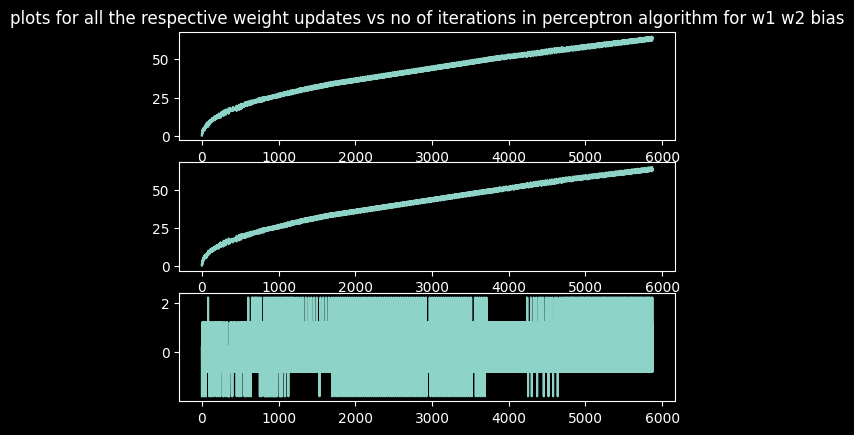

In [ ]:
perceptron1.__train__()

## Retrieving The Final Weights After Training

In [ ]:
perceptron1.__getweights__()

array([63.76047784, 63.54006015,  0.20302394])

## Plotting The Data And Predictions

<ipython-input-367-066debea883b>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)


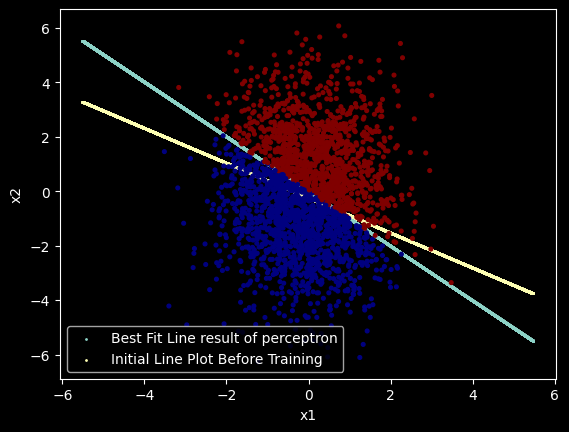

In [ ]:
if perceptron1.length<=3:
  mino = min(list(df["x1"]))
  maxo = max(list(df["x1"]))
  coefficients = perceptron1.__getweights__()
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,s=1)

  coefficients = initial_weights
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)
  plt.legend(labels=["Best Fit Line result of perceptron", "Initial Line Plot Before Training"])
  plt.scatter(df['x1'], df['x2'], cmap = 'jet',c=df['y'],s=7)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

## Creating An Instance Of Gradient Descent Algorithm Class

In [ ]:
gradientdescent1 = Gradientdescent(df.drop("y",axis=1),df["y"],lr=0.01)

In [ ]:
initial_weights = gradientdescent1.__getweights__()
initial_weights

array([1.39097593, 1.33414911, 1.38774108])

## Training Using Gradient Descent

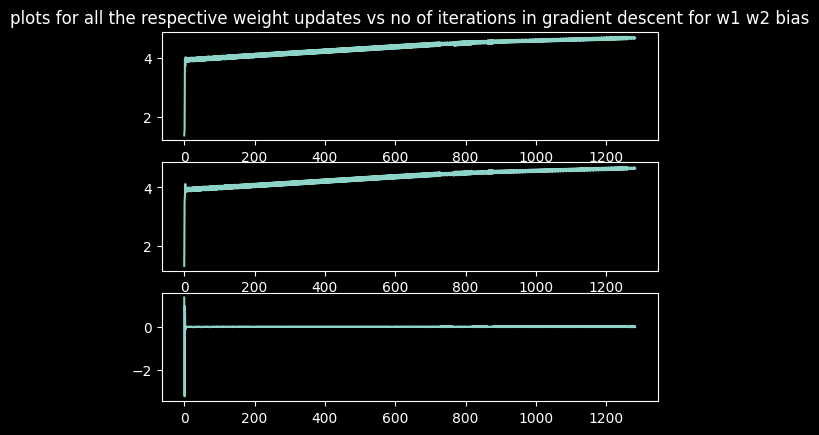

In [ ]:
gradientdescent1.__train__()

## Retrieving The Final Weights After Training

In [ ]:
gradientdescent1.__getweights__()

array([4.66084084, 4.64692867, 0.00774108])

## Plotting The Data And Predictions

<ipython-input-372-85cc22ccf877>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)


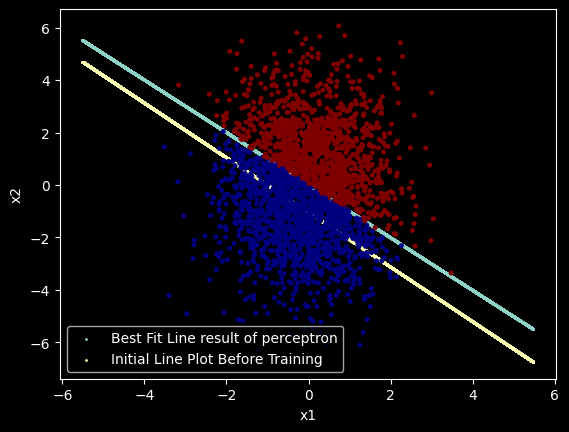

In [ ]:
if gradientdescent1.length<=3:
  mino = min(list(df["x1"]))
  maxo = max(list(df["x1"]))
  coefficients = gradientdescent1.__getweights__()
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,s=1)

  coefficients = initial_weights
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)
  plt.legend(labels=["Best Fit Line result of perceptron", "Initial Line Plot Before Training"])
  plt.scatter(df['x1'], df['x2'], cmap = 'jet',c=df['y'],s=7)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

## Changing The Learning Rate To See The Difference In Training

In [ ]:
gradientdescent1.lr = 0.0001

## Reset The Weights

In [ ]:
gradientdescent1.__reset__()

In [ ]:
initial_weights = gradientdescent1.__getweights__()
initial_weights

array([1.11921601, 1.12184045, 0.95797625])

## Training Using Gradient Descent Using New Learning Rate

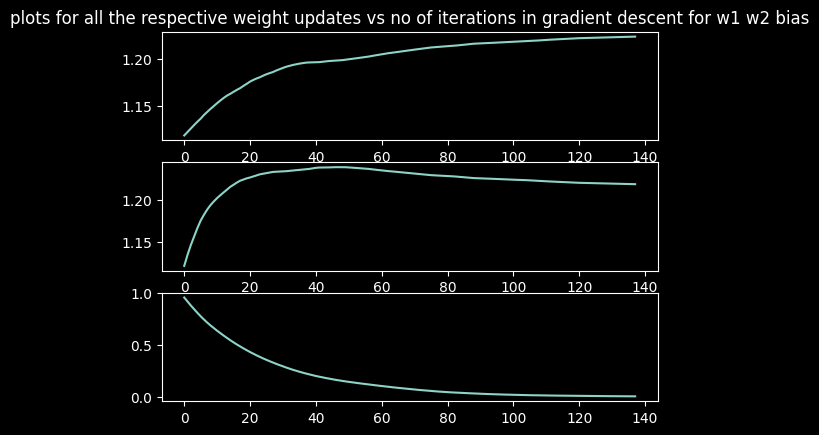

In [ ]:
gradientdescent1.__train__()

## Retrieving The Weights After Training With New Learning Rate

In [ ]:
gradientdescent1.__getweights__()

array([1.22303709, 1.21896765, 0.00417625])

## Plotting The Data And Predictions

<ipython-input-378-85cc22ccf877>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)


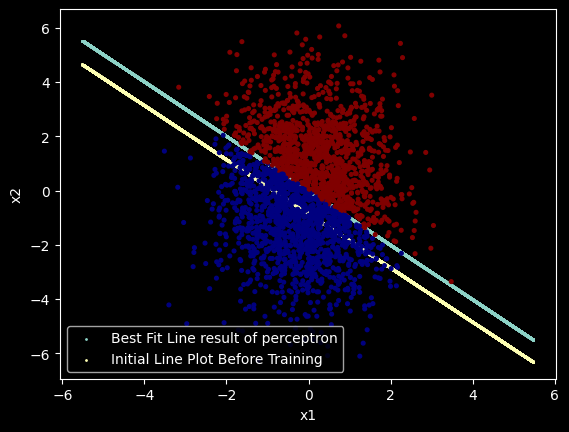

In [ ]:
if gradientdescent1.length<=3:
  mino = min(list(df["x1"]))
  maxo = max(list(df["x1"]))
  coefficients = gradientdescent1.__getweights__()
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,s=1)

  coefficients = initial_weights
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)
  plt.legend(labels=["Best Fit Line result of perceptron", "Initial Line Plot Before Training"])
  plt.scatter(df['x1'], df['x2'], cmap = 'jet',c=df['y'],s=7)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

## Simulation Form For Perceptron And Gradient Descent


The Initial Weights Before Training Are
[0.34725675 0.30192936 0.97710312]



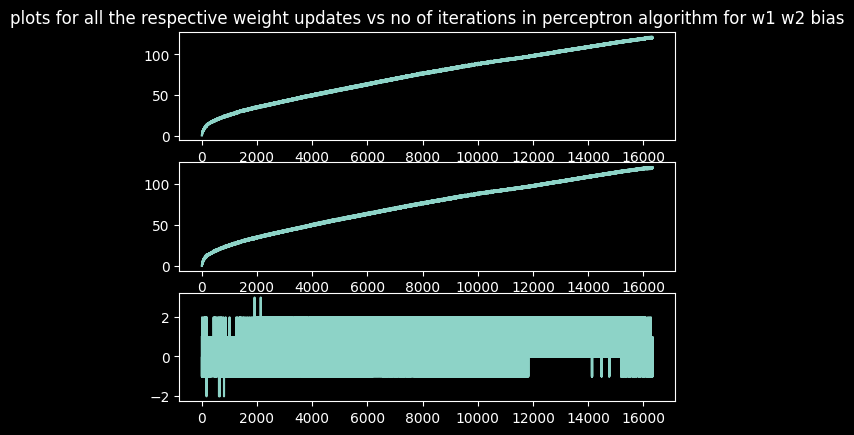


The Final Weights After Training Are
[ 1.20280611e+02  1.20325752e+02 -2.28968822e-02]

The Final Data And The Predictions Are



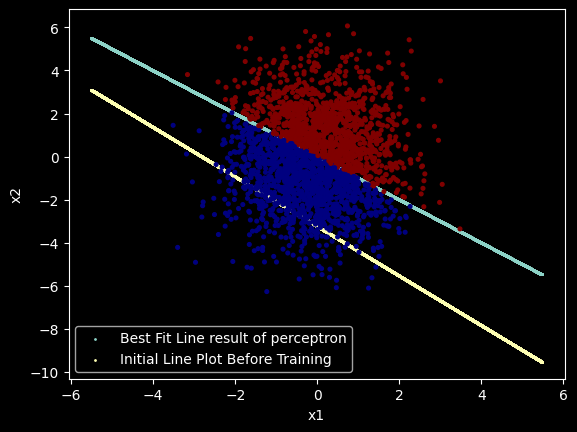

In [ ]:
Algorithm = "Perceptron" # @param ["Perceptron", "Gradient Descent"]
LearningRate = 0.8471 # @param {type:"slider", min:0.0001, max:100, step:0.001}

algo = Perceptron(df.drop("y",axis=1),df["y"]) if (Algorithm=="Perceptron") else Gradientdescent(df.drop("y",axis=1),df["y"],lr=LearningRate)
initial_weights = algo.__getweights__()
print("")
print("=======================================================")
print("The Initial Weights Before Training Are")
print("=======================================================")
print(algo.__getweights__())
print("=======================================================")
print("")
algo.__train__()
print("")
print("=======================================================")
print("The Final Weights After Training Are")
print("=======================================================")
print(algo.__getweights__())
print("=======================================================")
print("")
print("The Final Data And The Predictions Are")
print("")
print("=======================================================")
if algo.length<=3:
  mino = min(list(df["x1"]))
  maxo = max(list(df["x1"]))
  coefficients = algo.__getweights__()
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,s=1)

  coefficients = initial_weights
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,s=1)
  plt.legend(labels=["Best Fit Line result of perceptron", "Initial Line Plot Before Training"])
  plt.scatter(df['x1'], df['x2'], cmap = 'jet',c=df['y'],s=7)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

## Simple Neural Network (Linear Regression)

In [ ]:
class SimpleNeuralLinearRegression:
  def __init__(self,X,y,lr=0.001,threshold=1e-3):
    self.lr = lr
    self.data = X
    self.labels = y
    self.weights = 0.5*np.random.rand(len(X.columns))
    self.length = len(X.columns)
    self.updates = [[i] for i in list(self.weights)]
    self.lr = lr
    self.bias = np.random.rand(1)
    self.updates.append([self.bias])
    self.losses = []
    self.biases = [self.bias]
    self.temp =[]
    self.threshold = threshold
  def __predict__(self,row):
    return np.dot(row,self.weights)+self.bias
  def __getweights__(self):
    return self.weights
  def __getweightupdates__(self):
    return self.updates
  def __plotupdates__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(len(self.updates), 1)
    stro = ""
    count = 0
    while count<len(self.weights)-1:
      stro+="w"
      stro+=str(count+1)
      stro+=" "
      count+=1
    stro+="bias"
    axs[0].set_title("plots for all the respective weight and bias updates vs no of iterations in Simple Neural Network Linear Regression algorithm for "+stro)
    tempo = self.updates
    tempo[len(tempo)-1] = self.biases
    for i, update in enumerate(tempo):
        axs[i].plot(update)

    plt.show()
  def __lossplot__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)
    axs.set_title("Loss vs total Forward Passes")
    for i, update in enumerate([self.losses]):
        axs.plot(update)
    plt.show()
  def __forwardpass__(self):
    wixi = (self.data.to_numpy()@np.array(self.weights))
    wib = wixi+self.bias
    loss = ((wib-np.array(self.labels))@((wib-np.array(self.labels))).T)/len(list(self.labels))
    self.temp = np.array((wib-np.array(self.labels)))*(2/len(list(self.labels)))
    self.losses.append(loss)
    return loss
  def __backwardpass__(self):
    gradient = (((self.data).to_numpy().T)@self.temp)
    self.weights -= self.lr * gradient
    gradient = np.sum(self.temp)
    self.bias -= self.lr * gradient
    self.biases.append(self.bias)
    for i in range(len(list(self.weights))-1):
      self.updates[i].append(list(self.weights)[i])
    self.updates[len(list(self.weights))-1].append(self.bias)

  def __train__(self):
    loss = self.__forwardpass__()
    while loss>0:
      self.__backwardpass__()
      temp1 = self.losses[len(self.losses)-1]
      loss = self.__forwardpass__()
      if abs(temp1-loss)<self.threshold:
        break


## Preparing The dataset for Simple Linear Regression for simple neural Network

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X1 = 1 * np.random.uniform(0,10,1000)
X2 = 2 * np.random.uniform(0,10,1000)
y = 3 * X1 - 2 * X2 + 5 + 0.5 * np.random.rand(1000)
data = np.column_stack((X1, X2, y))
df = pd.DataFrame(data, columns=["x1", "x2", "y"])
X = df[["x1", "x2"]]
y = df["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SimpleNeuralLinearRegression(X_train, y_train, lr=0.001)



## Performing a forward pass and calculating the loss using the mean square loss as the loss function

In [ ]:
model.__forwardpass__()

283.4864393634793

## backward pass is to perform gradient descent and update the weights

In [ ]:
model.__backwardpass__()

## Training the model till it reaches convergence

In [ ]:
model.__train__()

## Checking the final error/Loss after the convergence

In [ ]:
model.__forwardpass__()

1.8067923967247126

## Plotting the Graphs for changes in weights bias,losses and also plotting actual labels vs predicted labels

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


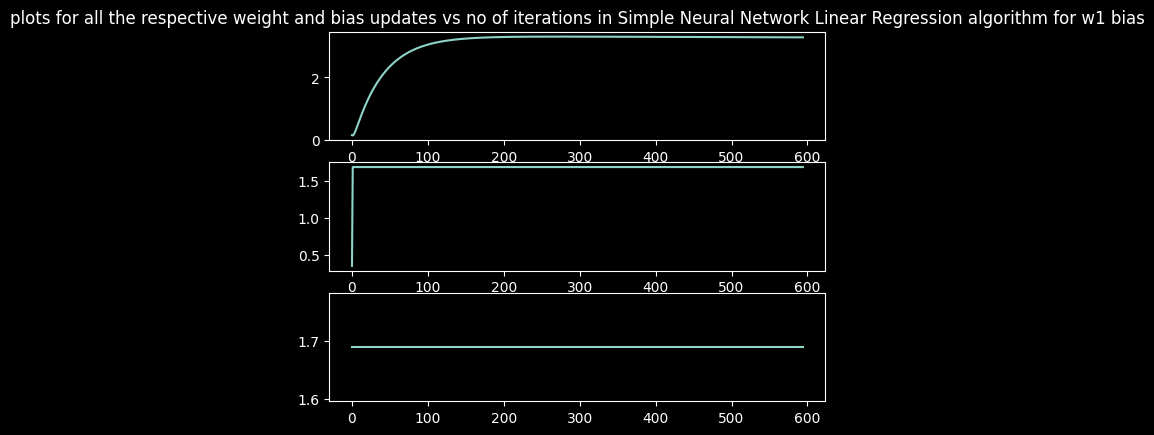

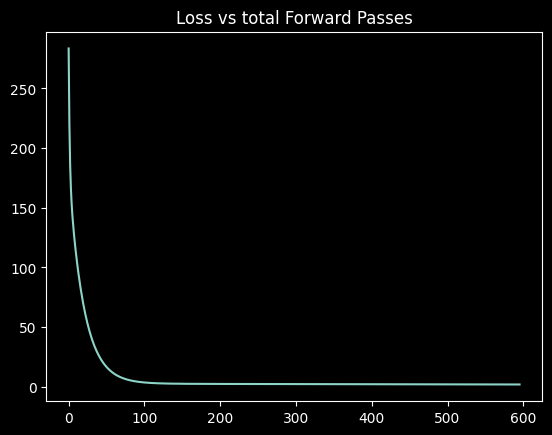

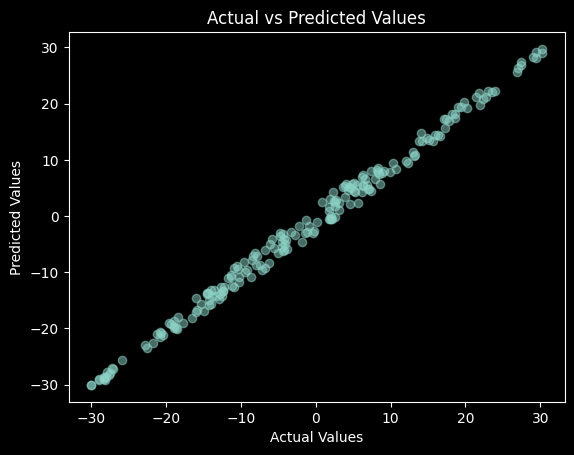

In [ ]:
model.__plotupdates__()
model.__lossplot__()
predictions = [model.__predict__(row) for row in X_test.to_numpy()]
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Implementing kaggle api to get the bouse prices dataset from kaggle

In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "nidamanuriadarsh"
os.environ['KAGGLE_KEY'] = "2182101e302215aeeb384015db62cdfb"
import kaggle
kaggle.api.dataset_download_files('yasserh/housing-prices-dataset', unzip=True, path='./')


2024-01-24 10:36:13,825 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/yasserh/housing-prices-dataset?datasetVersionNumber=None


In [ ]:
df = pd.read_csv("Housing.csv")

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Converting categorical values to numerical values and normalizing the data to reduce the spikes in loss function

In [ ]:
replacement_mapping = {'yes': 1, 'no': 2, 'furnished': 1,'semi-furnished':0,'unfurnished':2}
df['mainroad'] = df['mainroad'].replace(replacement_mapping)
df['guestroom'] = df['guestroom'].replace(replacement_mapping)
df['basement'] = df['basement'].replace(replacement_mapping)
df['hotwaterheating'] = df['hotwaterheating'].replace(replacement_mapping)
df['airconditioning'] = df['airconditioning'].replace(replacement_mapping)
df['prefarea'] = df['prefarea'].replace(replacement_mapping)
df['furnishingstatus'] = df['furnishingstatus'].replace(replacement_mapping)

## Implementing the SimpleNeuralNetwork instance

In [ ]:
# df = df[["area","bedrooms","bathrooms","stories","parking","price"]]
X = df.drop("price",axis=1)
X=(X-X.min())/(X.max()-X.min())
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SimpleNeuralLinearRegression(X_train, y_train, lr=0.001)

In [ ]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.298969,0.4,0.333333,1.000000,0.0,1.0,1.0,1.0,0.0,0.333333,1.0,0.5
93,0.381443,0.4,0.333333,0.000000,0.0,1.0,0.0,1.0,0.0,1.000000,1.0,0.0
335,0.148866,0.2,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,0.666667,1.0,0.5
412,0.065979,0.4,0.000000,0.333333,0.0,1.0,0.0,1.0,1.0,0.000000,0.0,1.0
471,0.144330,0.4,0.000000,0.333333,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,0.6,0.333333,1.000000,0.0,1.0,1.0,1.0,0.0,0.000000,1.0,1.0
106,0.261168,0.6,0.333333,0.000000,0.0,1.0,0.0,1.0,0.0,0.000000,0.0,0.0
270,0.195876,0.4,0.333333,0.666667,0.0,1.0,1.0,0.0,1.0,0.333333,1.0,0.5
435,0.164261,0.2,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,0.000000,1.0,1.0


## Training the Model Till convergence

In [ ]:
model.__train__()

## Plotting the changes in weights,biases,loss and actual vs predicted labels

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


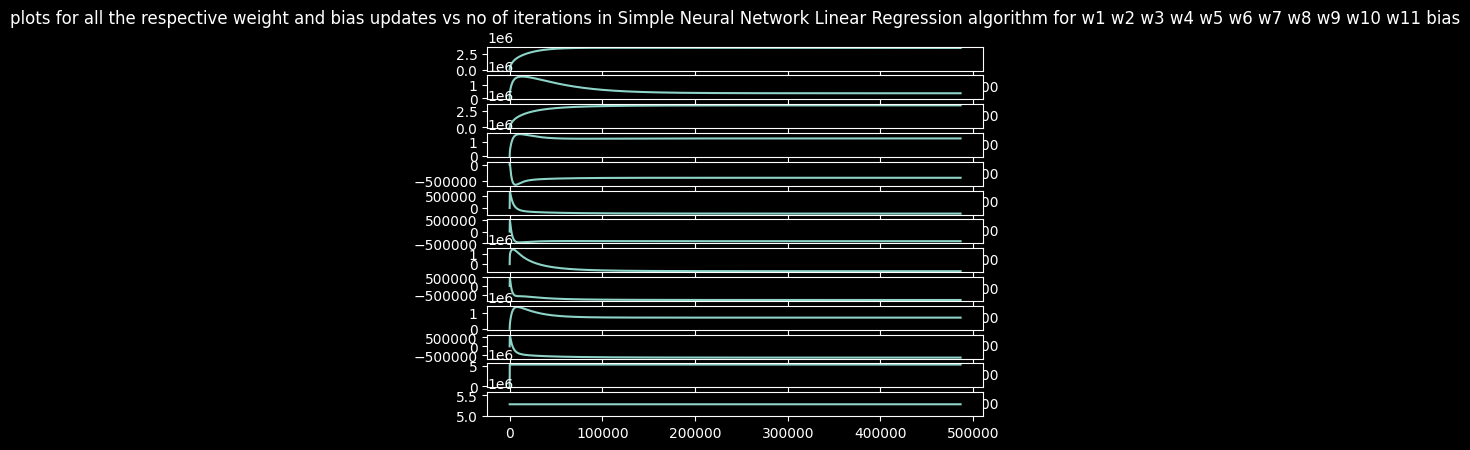

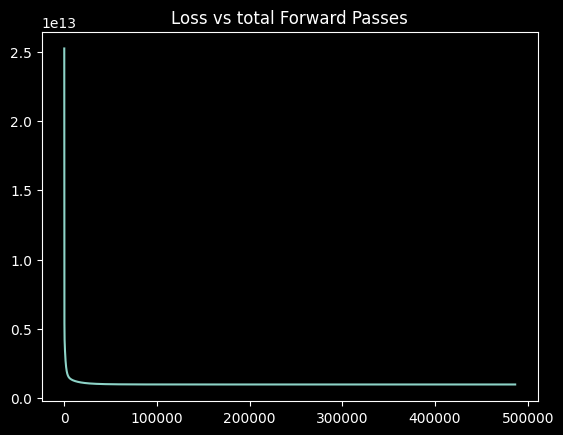

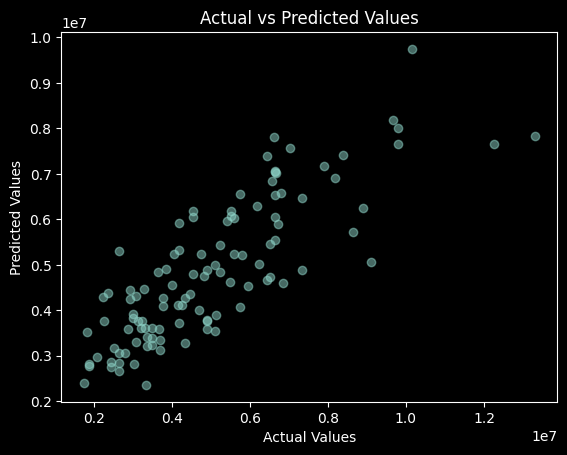

In [ ]:
model.__plotupdates__()
model.__lossplot__()
predictions = [model.__predict__(row) for row in X_test.to_numpy()]
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Checking the Final Mean Square Error

In [ ]:
model.__forwardpass__()

981079366504.4333

## Getting the Final Weights After Training

In [ ]:
model.__getweights__()

array([3453597.23730965,  371224.97238529, 3296339.4010065 ,
       1268453.5331881 , -399601.84070723, -236366.36323337,
       -413764.86524051, -696217.026918  , -814584.42919835,
        713540.50344402, -634402.46179174, -253827.91432034])

## Making a scatter plot of differences between actual and predicted labels of test data

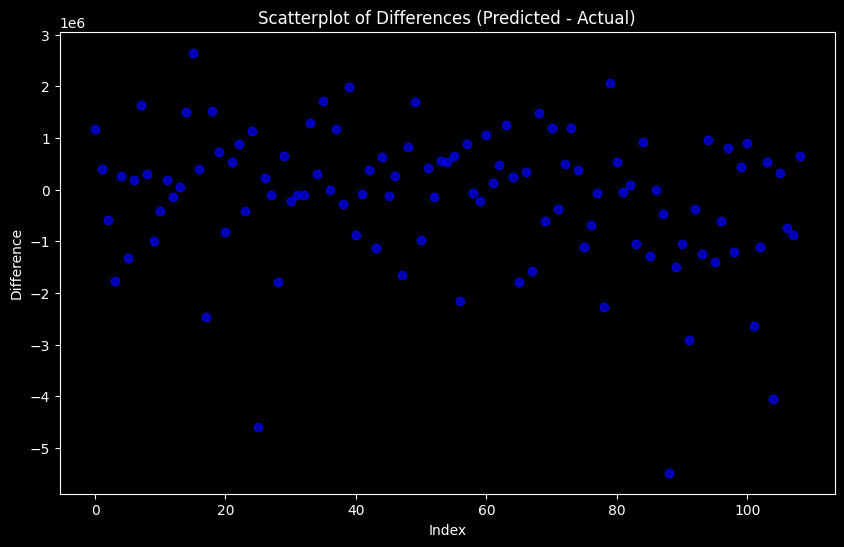

In [ ]:
Xt = X_test.to_numpy()
yt = y_test.to_numpy()
L=[]
L1=[]
mse = 0
for i in range(len(list(Xt))):
  L.append(model.__predict__(Xt[i])-yt[i])
  mse+=(model.__predict__(Xt[i])-yt[i])**2
  L1.append(i)
mse = mse/len(list(Xt))
plt.figure(figsize=(10, 6))
plt.scatter(L1, L, color='blue', alpha=0.7)
plt.title('Scatterplot of Differences (Predicted - Actual)')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.show()




## Obtained Mean Squared Error

In [ ]:
print("The mse error is:",mse)

The mse error is: [1.74775745e+12]


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,1.141284,1.822018,1.649541,1.954128,1.684404,0.693578,1.765138,0.910092
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000


## Comparing It with the already Implemented LinearRegression class in sklearn to check whether out implementation is accurate enough

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1747758260816.2192


## Making a scatter plot of differences between actual and predicted labels of test data for SKlearn Linear Regression Module

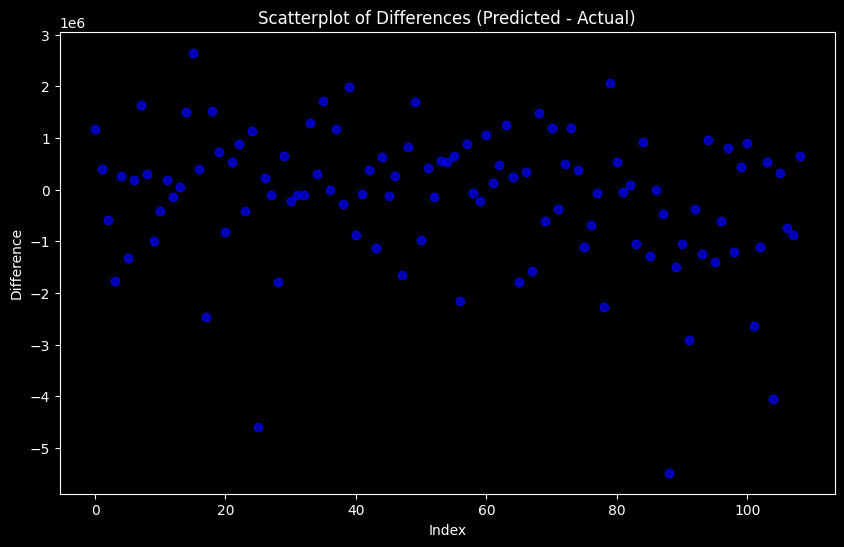

In [ ]:
Xt = X_test.to_numpy()
yt = y_test.to_numpy()
temp1 = np.array(model.predict(X_test))
temp2 = y_test.to_numpy()
tempfin = temp1-temp2
L=[]
L1=[]
for i in range(len(list(Xt))):
  L1.append(i)
L=tempfin
plt.figure(figsize=(10, 6))
plt.scatter(L1, L, color='blue', alpha=0.7)
plt.title('Scatterplot of Differences (Predicted - Actual)')
plt.xlabel('Index')
plt.ylabel('Difference')
plt.show()




## **As We can See Our model Performed Better Than the Simple Linear Regression SKLearn Model**




## Simulation for SimpleNeuralNetwork Linear Regression using the Above Implemented class

In [ ]:
WantToFetchDataFromKaggle = "Yes" # @param ["Yes", "No"]
DatasetURL = "https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles" # @param {type:"string"}
FileOutputPath = "./" # @param {type:"string"}
if WantToFetchDataFromKaggle=="Yes":
  import os
  os.environ['KAGGLE_USERNAME'] = "nidamanuriadarsh"
  os.environ['KAGGLE_KEY'] = "2182101e302215aeeb384015db62cdfb"
  import kaggle
  kaggle.api.dataset_download_files(DatasetURL.replace("https://www.kaggle.com/datasets/",""), unzip=True, path=FileOutputPath)

In [ ]:
WantToUploadCsvFile = "Yes" # @param ["Yes", "No"]
from google.colab import files
if WantToUploadCsvFile=="Yes":
  uploaded = files.upload()
  for filename, content in uploaded.items():
      print(f'Uploaded file: {filename}, size: {len(content)} bytes')

Train Data Initial Loss Before Training is:  65281.53538824039
Converged After 2420 no of iterations
Train Data Loss After Training is: 327.34977060445794
Test Loss on Test Data after training is:  [323.96854483]


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


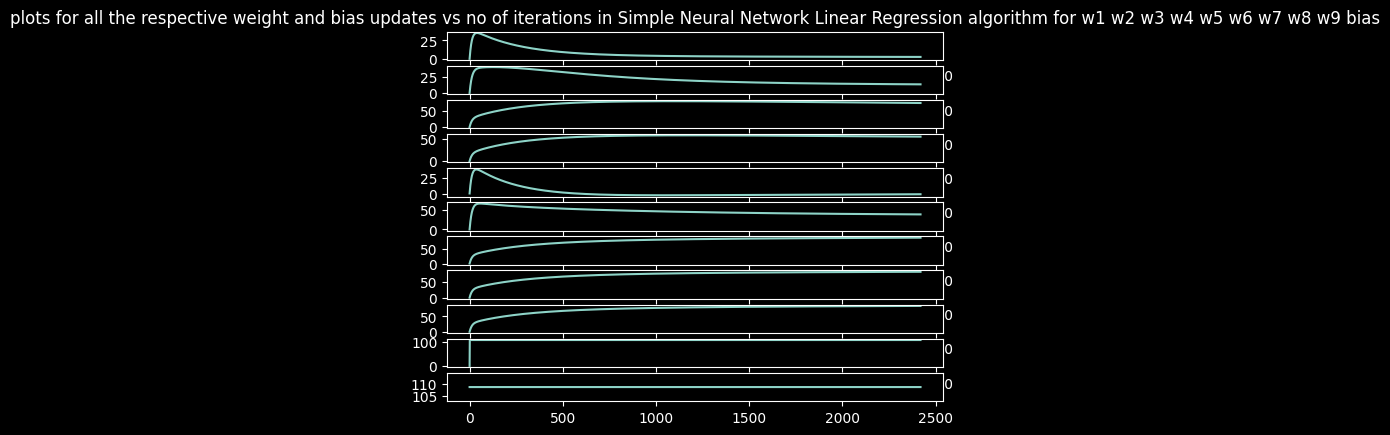

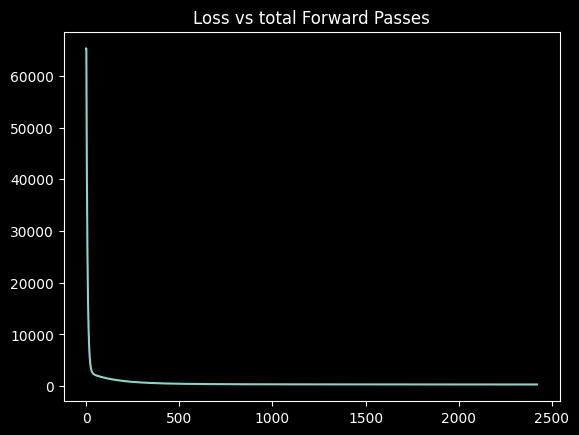

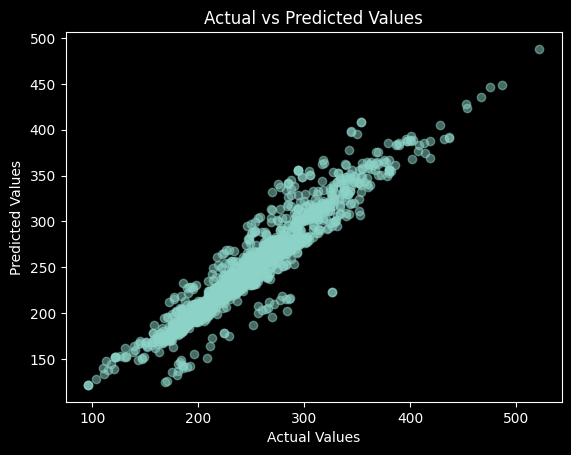

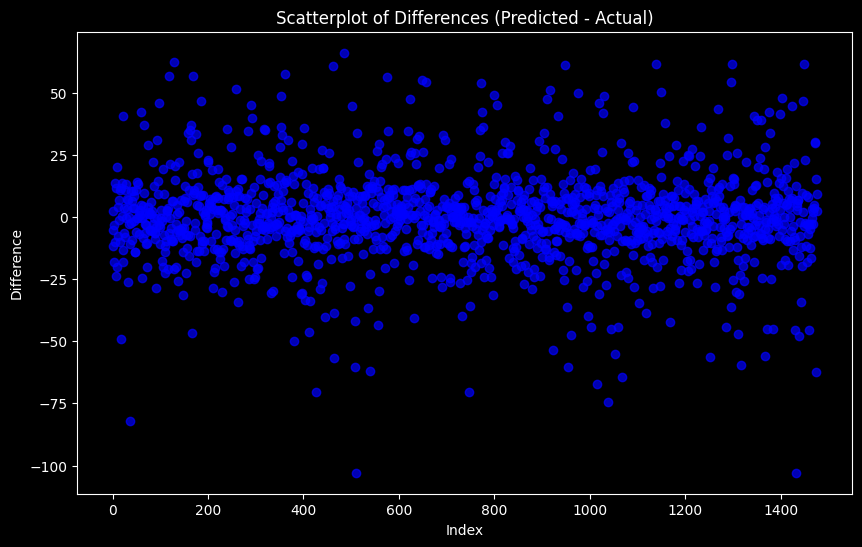

In [ ]:
Dataset_Relative_Path = "./CO2 Emissions_Canada.csv" # @param {type:"string"}
Learning_Rate = 0.0137 # @param {type:"slider", min:0.0001, max:0.9, step:0.0001}
Threshold = 0.008 # @param {type:"slider", min:0, max:0.01, step:0.001}
labelcolumnname = "CO2 Emissions(g/km)" # @param {type:"string"}
TestSplit = 0.2 # @param {type:"slider", min:0, max:0.5, step:0.05}
ShowPlots = "Yes" # @param ["Yes", "No"]
RandomState = 33 # @param {type:"slider", min:1, max:100, step:1}
removeextracolumns = "Model" # @param {type:"string"}
RemoveNullRows = "Yes" # @param ["Yes", "No"]

df = pd.read_csv(Dataset_Relative_Path)
if removeextracolumns!="":
  rem = removeextracolumns.split(",")
  for re in rem:
    df = df.drop(re,axis=1)
if RemoveNullRows=="Yes":
  df = df.dropna()
categorical_columns = df.select_dtypes(include=['object']).columns
def encode_categorical_columns(df):
    df_encoded = df.copy()
    encoding_dict = {}
    for column in df.select_dtypes(include=['object']).columns:
        encoded_column, categories = pd.factorize(df[column], sort=True)
        encoding_dict[column] = dict(zip(categories, encoded_column))
        df_encoded[column] = encoded_column

    return df_encoded, encoding_dict
df,_ = encode_categorical_columns(df)
X = df.drop(labelcolumnname,axis=1)
X=(X-X.min())/(X.max()-X.min())
y = df[labelcolumnname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TestSplit, random_state=RandomState)
model = SimpleNeuralLinearRegression(X_train, y_train, lr=Learning_Rate,threshold=Threshold)
print("Train Data Initial Loss Before Training is: ",model.__forwardpass__())
print("======================================")
model.__train__()
# print("======================================")
print("Converged After "+str(len(model.updates[0]))+" no of iterations")
print("======================================")
print("Train Data Loss After Training is:",model.losses[len(model.losses)-1])
print("======================================")
Xt = X_test.to_numpy()
yt = y_test.to_numpy()
L=[]
L1=[]
mse = 0
for i in range(len(list(Xt))):
  L.append(model.__predict__(Xt[i])-yt[i])
  mse+=(model.__predict__(Xt[i])-yt[i])**2
  L1.append(i)
mse = mse/len(list(Xt))
finlos = mse
print("Test Loss on Test Data after training is: ",finlos)
print("=====================================")
if ShowPlots=="Yes":
  model.__plotupdates__()
  model.__lossplot__()
  predictions = [model.__predict__(row) for row in X_test.to_numpy()]
  plt.scatter(y_test, predictions, alpha=0.5)
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs Predicted Values")
  plt.show()
  plt.figure(figsize=(10, 6))
  plt.scatter(L1, L, color='blue', alpha=0.7)
  plt.title('Scatterplot of Differences (Predicted - Actual)')
  plt.xlabel('Index')
  plt.ylabel('Difference')
  plt.show()

In [ ]:
df

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...
7380,41,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,12,2.0,4,17,4,11.2,8.3,9.9,29,232


## Simple Neural Network Classification

In [ ]:
class SimpleNeuralNetworkClassification:
  def __init__(self,X,y,lr=0.001,threshold=1e-3):
    self.lr = lr
    self.data = X
    self.labels = y
    self.weights = 0.5*np.random.rand(len(X.columns))
    self.length = len(X.columns)
    self.updates = [[i] for i in list(self.weights)]
    self.lr = lr
    self.bias = np.random.rand(1)
    self.updates.append([self.bias])
    self.losses = []
    self.biases = [self.bias]
    self.temp =[]
    self.threshold = threshold
  def __predict__(self,row):
    return np.round(self.__sigmoid__(np.dot(row,self.weights)+self.bias))
  def accuracy(self):
    wixi = (self.data.to_numpy()@np.array(self.weights))
    wib = wixi+self.bias
    sigs = self.__sigmoid__(wib)
    predictions = np.round(sigs)
    correct = np.sum(predictions == self.labels)
    total = len(self.labels)
    acc = correct / total * 100.0
    return acc
  def __getweights__(self):
    return self.weights
  def __getweightupdates__(self):
    return self.updates
  def __sigmoid__(self, p):
    return 1 / (1 + np.exp(-p))
  def binarycrossentropyloss(self,Q,y):
    temp1 = (np.array(y)).T@np.log(np.maximum(1e-15,Q))
    temp2 = temp2 = (np.ones(len(y)) - np.array(y)).T @ (np.log(np.maximum(1e-15, np.ones(len(Q)) - np.array(Q))))
    return (-1*(temp1+temp2))/len(y)
  def __plotupdates__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(len(self.updates), 1)
    stro = ""
    count = 0
    while count<len(self.weights)-1:
      stro+="w"
      stro+=str(count+1)
      stro+=" "
      count+=1
    stro+="bias"
    axs[0].set_title("plots for all the respective weight and bias updates vs no of iterations in Simple Neural Network Linear Regression algorithm for "+stro)
    tempo = self.updates
    tempo[len(tempo)-1] = self.biases
    for i, update in enumerate(tempo):
        axs[i].plot(update)

    plt.show()
  def __lossplot__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)
    axs.set_title("Loss vs total Forward Passes")
    for i, update in enumerate([self.losses]):
        axs.plot(update)
    plt.show()
  def __forwardpass__(self):
    wixi = (self.data.to_numpy()@np.array(self.weights))
    wib = wixi+self.bias
    sigs = self.__sigmoid__(wib)
    loss = self.binarycrossentropyloss(sigs,self.labels)
    self.temp = -1*(np.array(self.labels)-np.array(sigs))
    self.losses.append(loss)
    return loss
  def __backwardpass__(self):
    gradient = (((self.data).to_numpy().T)@self.temp)
    self.weights -= self.lr * gradient
    gradient = np.sum(self.temp)
    self.bias -= self.lr * gradient
    self.biases.append(self.bias)
    for i in range(len(list(self.weights))-1):
      self.updates[i].append(list(self.weights)[i])
    self.updates[len(list(self.weights))-1].append(self.bias)

  def __train__(self):
    loss = self.__forwardpass__()
    while loss>0:
      self.__backwardpass__()
      temp1 = self.losses[len(self.losses)-1]
      loss = self.__forwardpass__()
      if abs(temp1-loss)<self.threshold:
        break


In [ ]:
x1 = 1*np.random.randn(25000)
x2 = 2*np.random.randn(25000)
y = np.zeros(25000)
y[x1+x2 >= 0] = 1
y[x1+x2 < 0] = 0
data = np.array([x1, x2, y]).T
df = pd.DataFrame(data,columns=["x1","x2","y"])

In [ ]:
df

,x1,x2,y
0,1.951048,1.411588,1.0
1,-0.248226,-0.357371,0.0
2,-0.162744,1.778795,1.0
3,-0.102410,-0.044970,0.0
4,-0.194818,1.136950,1.0
...,...,...,...
24995,0.534735,1.314762,1.0
24996,0.456206,-4.030754,0.0
24997,0.074837,1.659145,1.0
24998,1.932955,1.979979,1.0


In [ ]:
classify = SimpleNeuralNetworkClassification(df.drop("y",axis=1),df["y"],lr=0.0001,threshold=1e-7)

In [ ]:
initial_weights = list(classify.__getweights__())
initial_weights.append(classify.bias)

In [ ]:
classify.__forwardpass__()

0.49948429349662293

In [ ]:
classify.__train__()

In [ ]:
classify.__forwardpass__()

0.009003546695483824

<ipython-input-414-8c3baf94e86e>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)


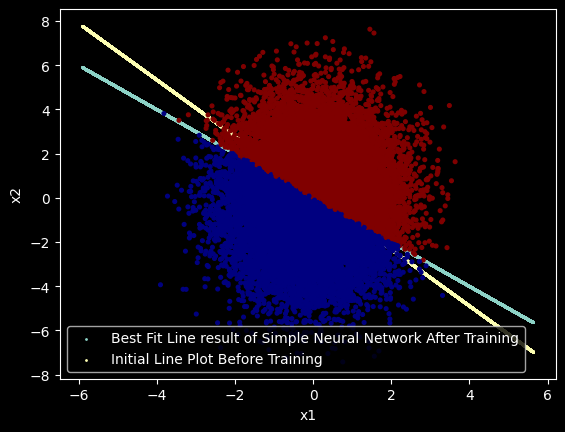

In [ ]:
if classify.length<3:
  mino = min(list(df["x1"]))
  maxo = max(list(df["x1"]))
  coefficients = list(classify.__getweights__())
  coefficients.append(classify.bias)
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,s=1)

  coefficients = initial_weights
  x1 = []
  x2 = []
  step = 0.001
  count = mino-2
  while count<maxo+2:
    x1.append(count)
    x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
    count+=step
  plt.scatter(x1,x2,cmap="gist_rainbow",s=1)
  plt.legend(labels=["Best Fit Line result of Simple Neural Network After Training", "Initial Line Plot Before Training"])
  plt.scatter(df['x1'], df['x2'], cmap = 'jet',c=df['y'],s=7)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

## **SIMULATION FOR SIMPLE NEURAL NETWORK CLASSIFICATION**

In [ ]:
WantToFetchDataFromKaggle = "Yes" # @param ["Yes", "No"]
DatasetURL = "https://www.kaggle.com/datasets/yasserh/heart-disease-dataset" # @param {type:"string"}
FileOutputPath = "./" # @param {type:"string"}
if WantToFetchDataFromKaggle=="Yes":
  import os
  os.environ['KAGGLE_USERNAME'] = "nidamanuriadarsh"
  os.environ['KAGGLE_KEY'] = "2182101e302215aeeb384015db62cdfb"
  import kaggle
  kaggle.api.dataset_download_files(DatasetURL.replace("https://www.kaggle.com/datasets/",""), unzip=True, path=FileOutputPath)

In [ ]:
WantToUploadCsvFile = "Yes" # @param ["Yes", "No"]
from google.colab import files
if WantToUploadCsvFile=="Yes":
  uploaded = files.upload()
  for filename, content in uploaded.items():
      print(f'Uploaded file: {filename}, size: {len(content)} bytes')

Train Data Initial Loss Before Training is:  0.8429991148014119
Train Data Initial Accuracy(in%) Before Training is:  56.25
Converged After 39 no of iterations


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


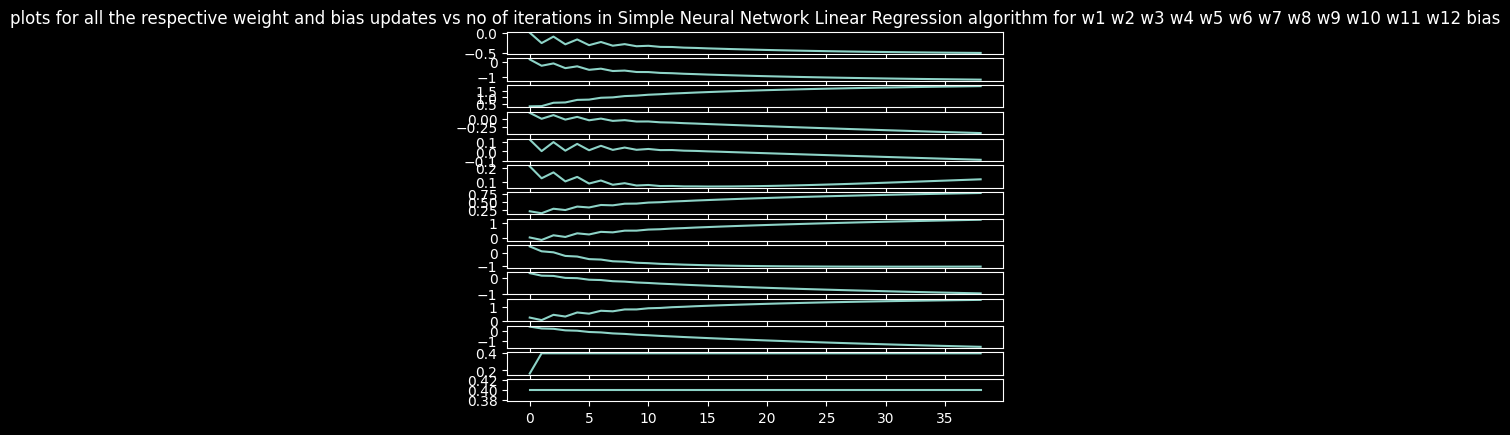

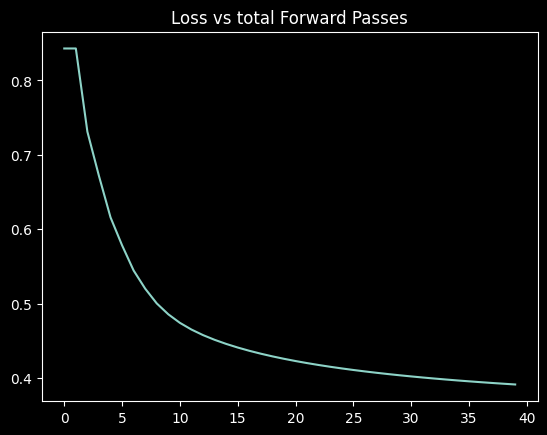

Train Data Loss After Training is: 0.3914396557562943
Train Data Initial Accuracy(in%) After Training is:  82.72058823529412
Test Loss on Test Data after training is:  0.34376782631388086
Test Data Accuracy(in%) After Training is:  83.87096774193549


In [ ]:
from sklearn.model_selection import train_test_split
Dataset_Relative_Path = "./heart.csv" # @param {type:"string"}
Learning_Rate = 0.0077 # @param {type:"slider", min:0.0001, max:0.9, step:0.0001}
Threshold = 0.001 # @param {type:"slider", min:0, max:0.01, step:0.001}
labelcolumnname = "target" # @param {type:"string"}
TestSplit = 0.1 # @param {type:"slider", min:0, max:0.5, step:0.05}
ShowPlots = "Yes" # @param ["Yes", "No"]
RandomState = 33 # @param {type:"slider", min:1, max:100, step:1}
removeextracolumns = "" # @param {type:"string"}
RemoveNullRows = "Yes" # @param ["Yes", "No"]

df = pd.read_csv(Dataset_Relative_Path)
if removeextracolumns!="":
  rem = removeextracolumns.split(",")
  for re in rem:
    df = df.drop(re,axis=1)
if RemoveNullRows=="Yes":
  df = df.dropna()
categorical_columns = df.select_dtypes(include=['object']).columns
def encode_categorical_columns(df):
    df_encoded = df.copy()
    encoding_dict = {}
    for column in df.select_dtypes(include=['object']).columns:
        encoded_column, categories = pd.factorize(df[column], sort=True)
        encoding_dict[column] = dict(zip(categories, encoded_column))
        df_encoded[column] = encoded_column

    return df_encoded, encoding_dict
df,_ = encode_categorical_columns(df)
X = df.drop(labelcolumnname,axis=1)
X=(X-X.min())/(X.max()-X.min())
y = df[labelcolumnname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TestSplit, random_state=RandomState)
model = SimpleNeuralNetworkClassification(X_train, y_train, lr=Learning_Rate,threshold=Threshold)
initial_weights = list(model.__getweights__())
initial_weights.append(model.bias)
print("Train Data Initial Loss Before Training is: ",model.__forwardpass__())
print("======================================")
print("Train Data Initial Accuracy(in%) Before Training is: ",model.accuracy())
print("======================================")
model.__train__()
# print("======================================")
print("Converged After "+str(len(model.updates[0]))+" no of iterations")
print("======================================")
if ShowPlots=="Yes":
  model.__plotupdates__()
  model.__lossplot__()
  if model.length<3:
    mino = min(list(df["x1"]))
    maxo = max(list(df["x1"]))
    coefficients = list(model.__getweights__())
    coefficients.append(model.bias)
    x1 = []
    x2 = []
    step = 0.001
    count = mino-2
    while count<maxo+2:
      x1.append(count)
      x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
      count+=step
    plt.scatter(x1,x2,s=1)

    coefficients = initial_weights
    x1 = []
    x2 = []
    step = 0.001
    count = mino-2
    while count<maxo+2:
      x1.append(count)
      x2.append(-1*(coefficients[2]+(coefficients[0]*count))/coefficients[1])
      count+=step
    plt.scatter(x1,x2,cmap="gist_rainbow",s=1)
    plt.legend(labels=["Best Fit Line result of Simple Neural Network After Training", "Initial Line Plot Before Training"])
    plt.scatter(df['x1'], df['x2'], cmap = 'jet',c=df['y'],s=7)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
print("Train Data Loss After Training is:",model.losses[len(model.losses)-1])
print("======================================")
print("Train Data Initial Accuracy(in%) After Training is: ",model.accuracy())
print("======================================")
Xt = X_test.to_numpy()
yt = y_test.to_numpy()
model.data = X_test
model.labels = y_test
finlos = model.__forwardpass__()
print("Test Loss on Test Data after training is: ",finlos)
print("=====================================")
print("Test Data Accuracy(in%) After Training is: ",model.accuracy())
print("======================================")

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## **SIMPLE NEURAL NETWORK MULTI CLASS CLASSIFICATION**

In [ ]:
class SimpleNeuralNetworkClassificationMultiLabel:
  def __init__(self,X,y,lr=0.001,threshold=1e-3):
    self.lr = lr
    self.data = X
    self.labels = y
    self.weights = 0.5*np.random.rand(len(X.columns),len(np.unique(y)))
    self.length = len(X.columns)
    self.updates = []
    self.bias = np.random.rand(1)
    self.updates.append([self.bias])
    self.losses = []
    self.biases = [self.bias]
    self.temp =[]
    self.threshold = threshold
    self.onehotencoded = []
    self.uniq = 0
    self.mapping = {}
    self.count1 = 0
  def onehotencode(self):
    uniq = np.unique(self.labels)
    mapping = {label: index for index, label in enumerate(uniq)}
    self.mapping = mapping
    leng = len(uniq)
    self.uniq = leng
    temp = np.zeros((len(self.labels), leng))
    temp[np.arange(len(self.labels)), np.array([mapping[label] for label in self.labels])] = 1
    self.labels = temp
  def __softmax__(self, p):
    temp = np.exp(p)
    temp1 = temp/np.sum(temp,axis=1)[:, np.newaxis]
    return temp1
  def crossentropyloss(self,Q,y):
    epsilon = 1e-15
    Q_safe = np.maximum(Q, epsilon)
    temp = np.log(Q_safe) * y
    return -1 * np.sum(temp)
  def __predict__(self,row):
    predictions = self.__softmax__((row@self.weights)+self.bias)
    temp = np.zeros_like(predictions)
    temp[np.argmax(predictions)]=1
    return temp
  def compute_gradient(self,Y, P):
    delta = np.eye(Y.shape[1])
    gradient = -np.sum(Y[:, np.newaxis, :] * (delta - P[:, :, np.newaxis]), axis=2)
    return gradient
  def accuracy(self):
    def helper(row):
      temp = np.zeros_like(row)
      temp[np.argmax(row)]=1
      return temp
    wixi = (self.data.to_numpy()@np.array(self.weights))
    wib = wixi+self.bias
    sigs = self.__softmax__(wib)
    predictions = np.apply_along_axis(helper, axis=1, arr=sigs)
    correct = np.sum(np.argmax(predictions,axis=1) == np.argmax(self.labels,axis=1))
    total = len(self.labels)
    acc = correct / total * 100.0
    return acc
  def __getweights__(self):
    return self.weights
  def __lossplot__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)
    axs.set_title("Loss vs total Forward Passes")
    for i, update in enumerate([self.losses]):
        axs.plot(update)
    plt.show()
  def __forwardpass__(self):
    wixi = (self.data.to_numpy()@np.array(self.weights))
    wib = wixi+self.bias
    sigs = self.__softmax__(wib)
    loss = self.crossentropyloss(sigs,self.labels)
    self.temp = self.compute_gradient(self.labels,sigs)
    self.losses.append(loss)
    return loss
  def __backwardpass__(self):
    gradient = (((self.data).to_numpy().T)@self.temp)
    self.weights -= self.lr * gradient
    gradient = np.sum(self.temp)
    self.bias -= self.lr * gradient
    self.biases.append(self.bias)
    self.count1+=1
  def __train__(self):
    loss = self.__forwardpass__()
    while loss>0:
      self.__backwardpass__()
      temp1 = self.losses[len(self.losses)-1]
      loss = self.__forwardpass__()
      if abs(temp1-loss)<self.threshold:
        break


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
num_samples = 25000
x1 = np.concatenate([
    np.random.randn(num_samples),
    np.random.randn(num_samples) + 2,
    np.random.randn(num_samples) - 2
])

x2 = np.concatenate([
    2 * np.random.randn(num_samples),
    2 * np.random.randn(num_samples) + 2,
    2 * np.random.randn(num_samples)
])
y = np.concatenate([
    np.zeros(num_samples),
    np.ones(num_samples),
    2 * np.ones(num_samples)
])

shuffle_indices = np.random.permutation(len(x1))
x1 = x1[shuffle_indices]
x2 = x2[shuffle_indices]
y = y[shuffle_indices]
data = np.array([x1, x2, y]).T
df = pd.DataFrame(data, columns=["x1", "x2", "y"])
print(df.head())


         x1        x2    y
0 -1.096054  0.212156  2.0
1  1.933360 -2.254092  0.0
2 -3.756578 -0.265974  2.0
3  0.174923 -3.093112  0.0
4 -2.491414  2.622139  2.0


In [ ]:
multi = SimpleNeuralNetworkClassificationMultiLabel(df.drop("y",axis=1),df["y"],lr=0.00001)

In [ ]:
multi.onehotencode()

In [ ]:
multi.labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
multi.accuracy()

52.44

In [ ]:
multi.__forwardpass__()

67913.49814191944

In [ ]:
multi.__backwardpass__()

In [ ]:
multi.__forwardpass__()

50899.89114549678

In [ ]:
multi.__train__()

In [ ]:
multi.__forwardpass__()

45386.97075879838

In [ ]:
multi.accuracy()

68.24799999999999

## **SIMULATION FOR SIMPLE NEURAL NETWORK MULTI CLASS CLASSIFICATION**

In [ ]:
WantToFetchDataFromKaggle = "Yes" # @param ["Yes", "No"]
DatasetURL = "https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset" # @param {type:"string"}
FileOutputPath = "./" # @param {type:"string"}
if WantToFetchDataFromKaggle=="Yes":
  import os
  os.environ['KAGGLE_USERNAME'] = "nidamanuriadarsh"
  os.environ['KAGGLE_KEY'] = "2182101e302215aeeb384015db62cdfb"
  import kaggle
  kaggle.api.dataset_download_files(DatasetURL.replace("https://www.kaggle.com/datasets/",""), unzip=True, path=FileOutputPath)

In [ ]:
WantToUploadCsvFile = "No" # @param ["Yes", "No"]
from google.colab import files
if WantToUploadCsvFile=="Yes":
  uploaded = files.upload()
  for filename, content in uploaded.items():
      print(f'Uploaded file: {filename}, size: {len(content)} bytes')

Train Data Initial Loss Before Training is:  340.30049294258265
Train Data Initial Accuracy(in%) Before Training is:  10.256410256410255
Converged After 1222 no of iterations


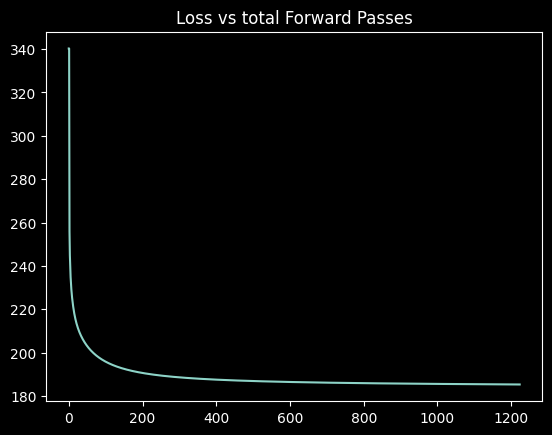

Train Data Loss After Training is: 185.3096839311516
Train Data Accuracy(in%) After Training is:  61.965811965811966
Test Loss on Test Data after training is:  53.01921881136401
Test Data Accuracy(in%) After Training is:  52.38095238095239


In [ ]:
from sklearn.model_selection import train_test_split
Dataset_Relative_Path = "./cirrhosis.csv" # @param {type:"string"}
Learning_Rate = 0.0112 # @param {type:"slider", min:0.0001, max:0.9, step:0.0001}
Threshold = 0.001 # @param {type:"slider", min:0, max:0.01, step:0.001}
labelcolumnname = "Stage" # @param {type:"string"}
TestSplit = 0.15 # @param {type:"slider", min:0, max:0.5, step:0.05}
ShowPlots = "Yes" # @param ["Yes", "No"]
RandomState = 33 # @param {type:"slider", min:1, max:100, step:1}
removeextracolumns = "ID" # @param {type:"string"}
RemoveNullRows = "Yes" # @param ["Yes", "No"]

df = pd.read_csv(Dataset_Relative_Path)
if removeextracolumns!="":
  rem = removeextracolumns.split(",")
  for re in rem:
    df = df.drop(re,axis=1)
if RemoveNullRows=="Yes":
  df = df.dropna()
categorical_columns = df.select_dtypes(include=['object']).columns
def encode_categorical_columns(df):
    df_encoded = df.copy()
    encoding_dict = {}
    for column in df.select_dtypes(include=['object']).columns:
        encoded_column, categories = pd.factorize(df[column], sort=True)
        encoding_dict[column] = dict(zip(categories, encoded_column))
        df_encoded[column] = encoded_column

    return df_encoded, encoding_dict
df,_ = encode_categorical_columns(df)
X = df.drop(labelcolumnname,axis=1)
X=(X-X.min())/(X.max()-X.min())
y = df[labelcolumnname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TestSplit, random_state=RandomState)
model = SimpleNeuralNetworkClassificationMultiLabel(X_train, y_train, lr=Learning_Rate,threshold=Threshold)
model.onehotencode()
print("Train Data Initial Loss Before Training is: ",model.__forwardpass__())
print("======================================")
print("Train Data Initial Accuracy(in%) Before Training is: ",model.accuracy())
print("======================================")
model.__train__()
# print("======================================")
print("Converged After "+str(model.count1)+" no of iterations")
print("======================================")
if ShowPlots=="Yes":
  model.__lossplot__()
print("Train Data Loss After Training is:",model.losses[len(model.losses)-1])
print("======================================")
print("Train Data Accuracy(in%) After Training is: ",model.accuracy())
print("======================================")
Xt = X_test.to_numpy()
yt = y_test.to_numpy()
model.data = X_test
model.labels = y_test
model.onehotencode()
finlos = model.__forwardpass__()
print("Test Loss on Test Data after training is: ",finlos)
print("=====================================")
print("Test Data Accuracy(in%) After Training is: ",model.accuracy())
print("======================================")

## Simple Neural Network (Polynomial Regression)

In [ ]:
class SimpleNeuralPolynomialRegression:
  def __init__(self,X,y,lr=0.001,threshold=1e-3,degree=1):
    self.lr = lr
    self.data = X
    self.labels = y
    self.degree = degree
    self.weights = 0.5*np.random.rand(len(X.columns))
    self.length = len(X.columns)
    self.updates = [[i] for i in list(self.weights)]
    self.lr = lr
    self.bias = np.random.rand(1)
    self.updates.append([self.bias])
    self.losses = []
    self.biases = [self.bias]
    self.temp =[]
    self.threshold = threshold
  def preparedata(self):
    degree = self.degree
    if degree!=1:
      self.data1 = self.data
      for i in range(2,degree+1):
        newweights = 0.5*np.random.rand(len(self.data.columns))
        self.weights = np.concatenate((self.weights,newweights),axis=0)
        self.data1 = np.concatenate((self.data1,self.data**i),axis=1)
      self.data = pd.DataFrame(self.data1)
      self.updates = [[i] for i in list(self.weights)]
      self.updates.append([self.bias])
  def preparedatatest(self):
    degree = self.degree
    if degree!=1:
      self.data1 = self.data
      for i in range(2,degree+1):
        self.data1 = np.concatenate((self.data1,self.data**i),axis=1)
      self.data = pd.DataFrame(self.data1)
  def __predict__(self,row):
    return np.dot(row,self.weights)+self.bias
  def __getweights__(self):
    return self.weights
  def __getweightupdates__(self):
    return self.updates
  def __plotupdates__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(len(self.updates), 1)
    stro = ""
    count = 0
    while count<len(self.weights)-1:
      stro+="w"
      stro+=str(count+1)
      stro+=" "
      count+=1
    stro+="bias"
    axs[0].set_title("plots for all the respective weight and bias updates vs no of iterations in Simple Neural Network Linear Regression algorithm")
    tempo = self.updates
    tempo[len(tempo)-1] = self.biases
    for i, update in enumerate(tempo):
        axs[i].plot(update)

    plt.show()
  def __lossplot__(self):
    plt.style.use('dark_background')
    fig, axs = plt.subplots(1, 1)
    axs.set_title("Loss vs total Forward Passes")
    for i, update in enumerate([self.losses]):
        axs.plot(update)
    plt.show()
  def __forwardpass__(self):
    wixi = (self.data.to_numpy()@np.array(self.weights))
    wib = wixi+self.bias
    loss = ((wib-np.array(self.labels))@((wib-np.array(self.labels))).T)/len(list(self.labels))
    self.temp = np.array((wib-np.array(self.labels)))*(2/len(list(self.labels)))
    self.losses.append(loss)
    return loss
  def __backwardpass__(self):
    gradient = (((self.data).to_numpy().T)@self.temp)
    self.weights -= self.lr * gradient
    gradient = np.sum(self.temp)
    self.bias -= self.lr * gradient
    self.biases.append(self.bias)
    for i in range(len(list(self.weights))-1):
      self.updates[i].append(list(self.weights)[i])
    self.updates[len(list(self.weights))-1].append(self.bias)

  def __train__(self):
    loss = self.__forwardpass__()
    while loss>0:
      self.__backwardpass__()
      temp1 = self.losses[len(self.losses)-1]
      loss = self.__forwardpass__()
      if abs(temp1-loss)<self.threshold:
        break


In [ ]:

X1 = 1 * np.random.randn(25000)
y = -7*X1**4+2*X1**3+4 * X1**2 - 5 * X1 + 5 + 0.5 * np.random.randn(25000)

noise_factor = 0
random_noise = noise_factor * np.random.randn(25000)

X1_with_noise = X1 + random_noise
y_with_noise = y + random_noise

data_with_noise = np.column_stack((X1_with_noise, y_with_noise))

df = pd.DataFrame(data_with_noise, columns=["x1", "y"])



In [ ]:
df

,x1,y
0,-2.108996,3838.313769
1,-1.648776,554.580994
2,0.062109,4.086148
3,-1.028135,22.300259
4,0.420062,4.096573
...,...,...
24995,-2.444068,12286.892364
24996,-0.003903,5.335183
24997,0.730073,3.012284
24998,2.434854,11958.038712


In [ ]:
model1 = SimpleNeuralPolynomialRegression(df.drop("y",axis=1),df["y"],lr=0.00000001,degree=8)

In [ ]:
model1.preparedata()

In [ ]:
initial_weights = [model1.__getweights__(),model1.bias]

In [ ]:
model1.__forwardpass__()

116460013.9558707

In [ ]:
model1.__backwardpass__()

In [ ]:
model1.__train__()

In [ ]:
model1.__forwardpass__()

2293.1463747038297

In [ ]:
final_weights = [model1.__getweights__(),model1.bias]

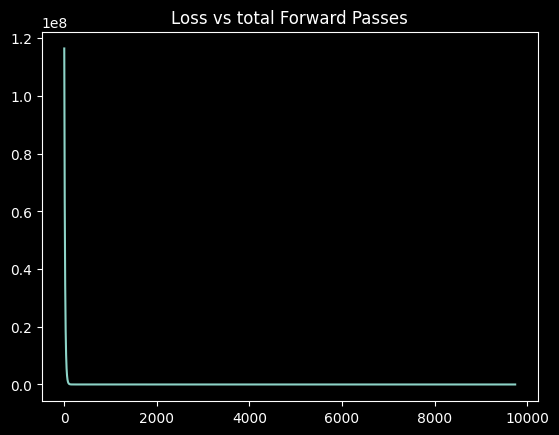

In [ ]:
model1.__lossplot__()

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


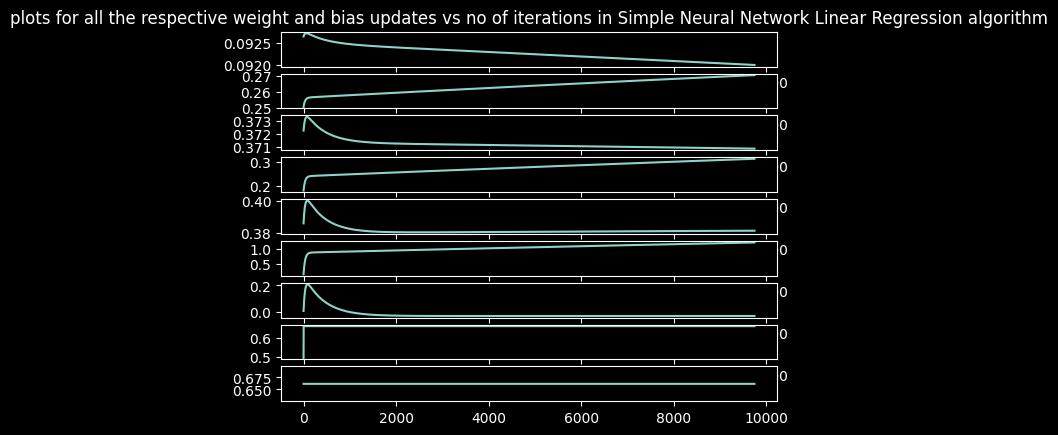

In [ ]:
model1.__plotupdates__()

In [ ]:
model1.__getweights__()

array([ 0.09200689,  0.27043283,  0.37087059,  0.31246236,  0.38142595,
        1.19824988, -0.02927786,  9.25555839])

In [ ]:
model1.bias

array([0.66166005])

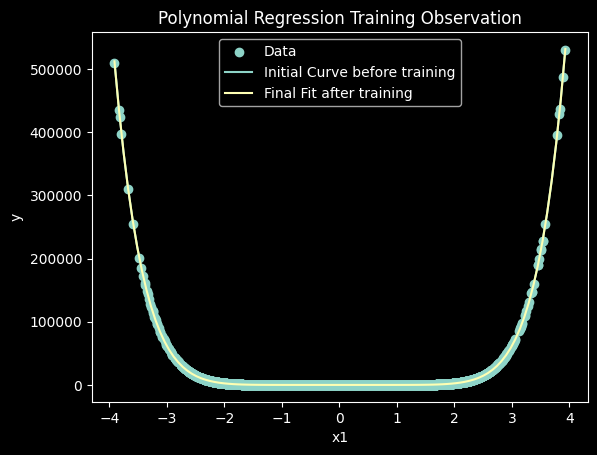

In [ ]:
def plot_graph(model, f, h, title=""):
    plt.scatter(model.data.iloc[:, 0], model.labels, label="Data")
    x_values = np.linspace(min(model.data.iloc[:, 0]), max(model.data.iloc[:, 0]), 100).reshape(-1, 1)
    y_f = f(x_values,model.degree)
    y_h = h(x_values,model.degree)
    plt.plot(x_values, y_f, label="Initial Curve before training")
    plt.plot(x_values, y_h, label="Final Fit after training")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("y")
    plt.legend()
    plt.show()
def f(data,degree):
  if degree==1:
    temp = np.dot(data,initial_weights[0])
    return temp+initial_weights[1]
  else:
    d1 = data
    d2 = data.copy()
    for i in range(2,degree+1):
      d1 = np.concatenate((d1,d2**i),axis=1)
    temp = np.dot(d1,initial_weights[0])
    return temp+initial_weights[1]
def h(data,degree):
  if degree==1:
    temp = np.dot(data,final_weights[0])
    return temp+final_weights[1]
  else:
    d1 = data
    d2 = data.copy()
    for i in range(2,degree+1):
      d1 = np.concatenate((d1,d2**i),axis=1)
    temp = np.dot(d1,final_weights[0])
    return temp+final_weights[1]
plot_graph(model1,f,h,title="Polynomial Regression Training Observation")

## Simulation For Polynomial Regression Using Simple Neural Network

In [ ]:
WantToFetchDataFromKaggle = "Yes" # @param ["Yes", "No"]
DatasetURL = "https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction" # @param {type:"string"}
FileOutputPath = "./" # @param {type:"string"}
if WantToFetchDataFromKaggle=="Yes":
  import os
  os.environ['KAGGLE_USERNAME'] = "nidamanuriadarsh"
  os.environ['KAGGLE_KEY'] = "2182101e302215aeeb384015db62cdfb"
  import kaggle
  kaggle.api.dataset_download_files(DatasetURL.replace("https://www.kaggle.com/datasets/",""), unzip=True, path=FileOutputPath)

In [ ]:
WantToUploadCsvFile = "Yes" # @param ["Yes", "No"]
from google.colab import files
if WantToUploadCsvFile=="Yes":
  uploaded = files.upload()
  for filename, content in uploaded.items():
      print(f'Uploaded file: {filename}, size: {len(content)} bytes')

Train Data Initial Loss Before Training is:  1505.4727814765122
Converged After 4176 no of iterations
Train Data Loss After Training is: 56.467750913762984


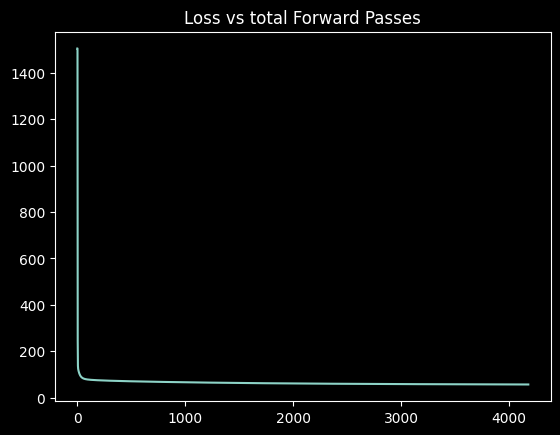

Test Loss on Test Data after training is:  93.57231347844305


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


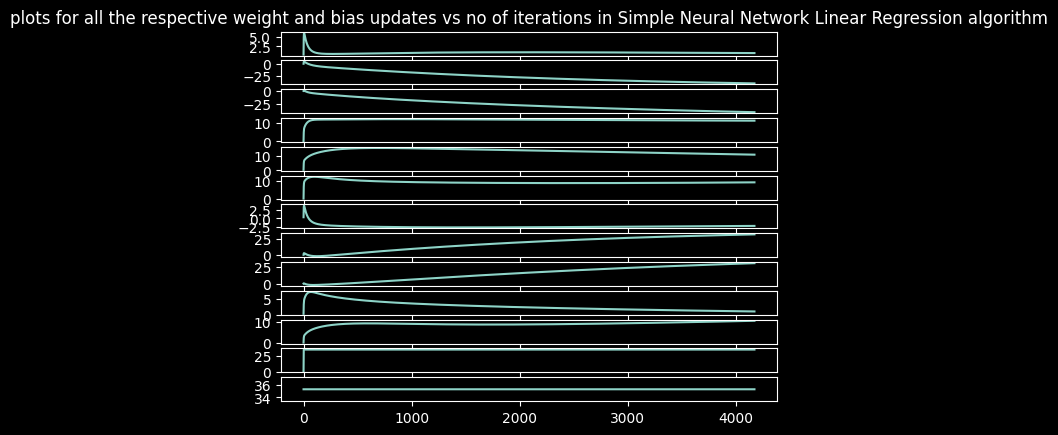

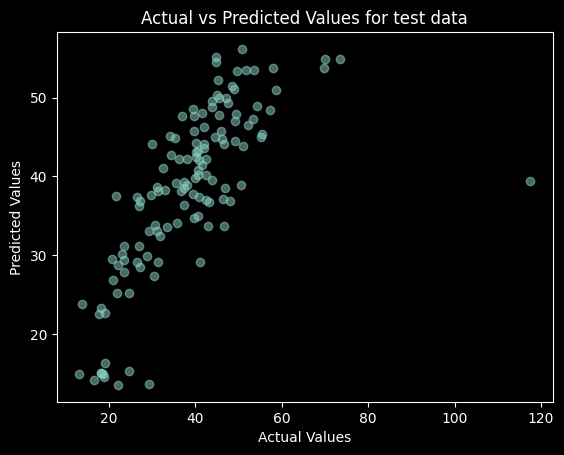

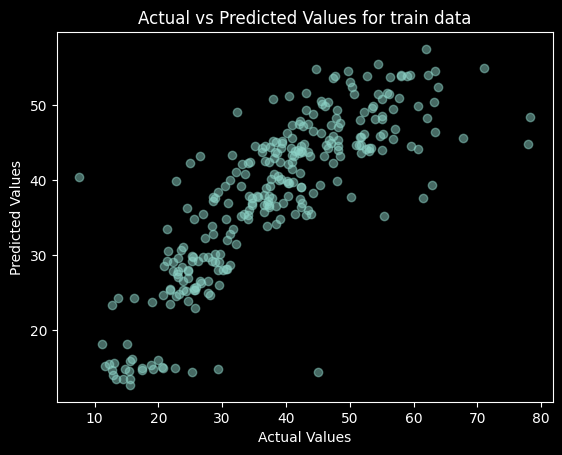

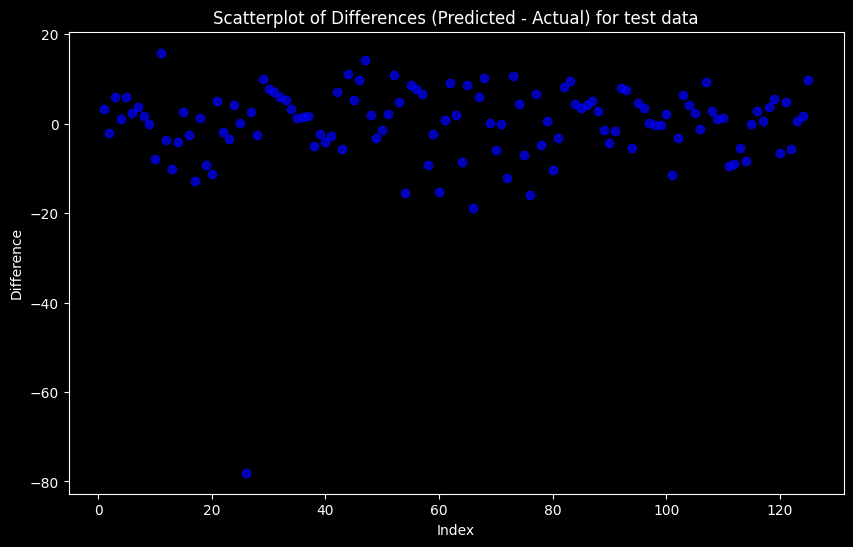

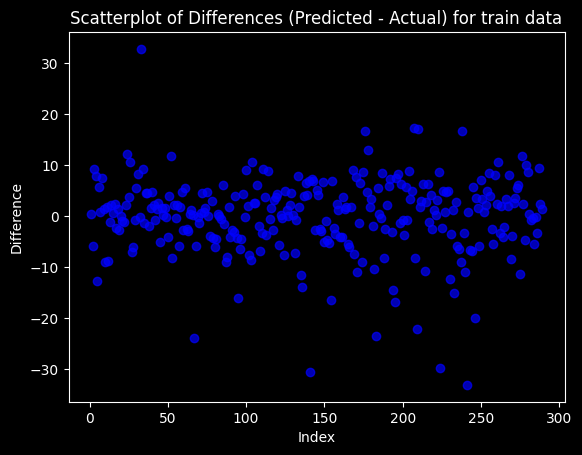

In [ ]:
Dataset_Relative_Path = "./Real estate.csv" # @param {type:"string"}
Learning_Rate = 0.0839 # @param {type:"slider", min:0.0001, max:0.9, step:0.0001}
Threshold = 0.001 # @param {type:"slider", min:0, max:0.01, step:0.001}
labelcolumnname = "Y house price of unit area" # @param {type:"string"}
TestSplit = 0.3 # @param {type:"slider", min:0, max:0.5, step:0.05}
ShowPlots = "Yes" # @param ["Yes", "No"]
RandomState = 44 # @param {type:"slider", min:1, max:100, step:1}
removeextracolumns = "X1 transaction date" # @param {type:"string"}
RemoveNullRows = "Yes" # @param ["Yes", "No"]
degree = 2 # @param {type:"slider", min:1, max:10, step:1}
from sklearn.model_selection import train_test_split

df = pd.read_csv(Dataset_Relative_Path)
if removeextracolumns!="":
  rem = removeextracolumns.split(",")
  for re in rem:
    df = df.drop(re,axis=1)
if RemoveNullRows=="Yes":
  df = df.dropna()
categorical_columns = df.select_dtypes(include=['object']).columns
def encode_categorical_columns(df):
    df_encoded = df.copy()
    encoding_dict = {}
    for column in df.select_dtypes(include=['object']).columns:
        encoded_column, categories = pd.factorize(df[column], sort=True)
        encoding_dict[column] = dict(zip(categories, encoded_column))
        df_encoded[column] = encoded_column

    return df_encoded, encoding_dict
df,_ = encode_categorical_columns(df)
X = df.drop(labelcolumnname,axis=1)
X=(X-X.min())/(X.max()-X.min())
y = df[labelcolumnname]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TestSplit, random_state=RandomState)
model = SimpleNeuralPolynomialRegression(X_train, y_train, lr=Learning_Rate,threshold=Threshold,degree=degree)
model.preparedata()
print("Train Data Initial Loss Before Training is: ",model.__forwardpass__())
print("======================================")
model.__train__()
# print("======================================")
print("Converged After "+str(len(model.updates[0]))+" no of iterations")
print("======================================")
print("Train Data Loss After Training is:",model.losses[len(model.losses)-1])
print("======================================")
if ShowPlots=="Yes":
  model.__lossplot__()
predictions1 = [model.__predict__(row) for row in model.data.to_numpy()]
predictions1 = np.array(predictions1).flatten()
L3 = np.arange(1,len(y_train)+1)
L2 = np.array(predictions1)-np.array(y_train)
Xt = X_test
yt = y_test
model.data = X_test
model.labels = y_test
model.preparedatatest()
finlos = model.__forwardpass__()
print("Test Loss on Test Data after training is: ",finlos)
print("=====================================")
if ShowPlots=="Yes":
  model.__plotupdates__()
  predictions = [model.__predict__(row) for row in model.data.to_numpy()]
  predictions = np.array(predictions).flatten()
  plt.scatter(y_test, predictions, alpha=0.5)
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs Predicted Values for test data")
  plt.show()
  plt.scatter(y_train, predictions1, alpha=0.5)
  plt.xlabel("Actual Values")
  plt.ylabel("Predicted Values")
  plt.title("Actual vs Predicted Values for train data")
  plt.show()
  plt.figure(figsize=(10, 6))
  L1 = np.arange(1,len(y_test)+1)
  L = np.array(predictions)-np.array(y_test)
  plt.scatter(L1, L, color='blue', alpha=0.7)
  plt.title('Scatterplot of Differences (Predicted - Actual) for test data')
  plt.xlabel('Index')
  plt.ylabel('Difference')
  plt.show()
  plt.scatter(L3, L2, color='blue', alpha=0.7)
  plt.title('Scatterplot of Differences (Predicted - Actual) for train data')
  plt.xlabel('Index')
  plt.ylabel('Difference')
  plt.show()